In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text
import re    #for regex
import string
import re    #for regex
import nltk
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
data = pd.read_csv('Sentiment_result.csv')

In [80]:
data

,Unnamed: 0,Phrase,Sentiment
0,1,A series of escapades demonstrating the adage ...,neutral
1,2,A series,neutral
2,3,A,neutral
3,4,series,neutral
4,5,of escapades demonstrating the adage that what...,neutral
...,...,...,...
74995,49995,I thought this movie did a down right good job...,positive
74996,49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
74997,49997,I am a Catholic taught in parochial elementary...,negative
74998,49998,I'm going to have to disagree with the previou...,negative


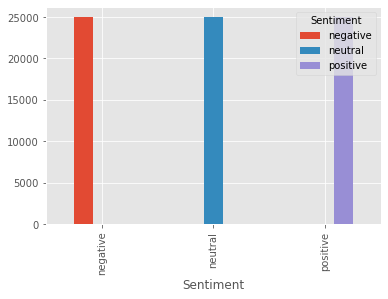

In [81]:
C = ['Sentiment']

for i in C:
    ch = pd.crosstab(data[i], data['Sentiment'])  
    ch.plot.bar()   
    plt.show() 

In [82]:
labeling = {
    'positive':1, 
    'negative':0,
    'neutral':2, 
    
}

data['Sentiment'] = data['Sentiment'].apply(lambda x : labeling[x])

In [83]:
data.head(10)


,Unnamed: 0,Phrase,Sentiment
0,1,A series of escapades demonstrating the adage ...,2
1,2,A series,2
2,3,A,2
3,4,series,2
4,5,of escapades demonstrating the adage that what...,2
5,6,of,2
6,7,escapades demonstrating the adage that what is...,2
7,8,escapades,2
8,9,demonstrating the adage that what is good for ...,2
9,10,demonstrating the adage,2


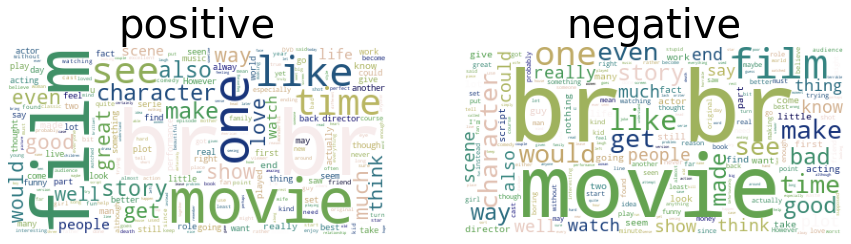

In [84]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
stopword = set(stopwords.words("english"))
subset=data[data.Sentiment == 1]
text=subset.Phrase.values
wc= WordCloud(background_color="White",max_words=500,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("positive", fontsize=40)
plt.imshow(wc.recolor(colormap= 'gist_earth'), alpha=0.98)


plt.subplot(122)
subset=data[data.Sentiment == 0]
text=subset.Phrase.values
wc= WordCloud(background_color="White",max_words=500,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("negative", fontsize=40)
plt.imshow(wc.recolor(colormap= 'gist_earth'), alpha=0.98)



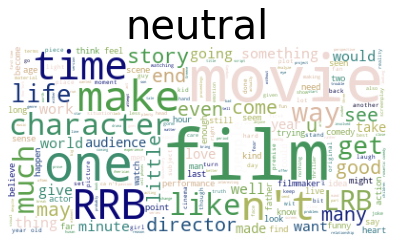

In [85]:
plt.figure(figsize=(15, 5))
plt.subplot(122)
subset=data[data.Sentiment == 2]
text=subset.Phrase.values
wc= WordCloud(background_color="White",max_words=500,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("neutral", fontsize=40)
plt.imshow(wc.recolor(colormap= 'gist_earth'), alpha=0.98)

In [86]:
data['Phrase'] = pd.DataFrame(data['Phrase'].astype('str')) 

In [10]:
import re
!pip install contractions
import contractions


i=0
for doc in data.Phrase:
    doc = doc.lower()
    doc=  re.sub(r"https?://\S+|www\.\S+",'', doc)  #Remove URLs from a sample string
    doc = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', doc) # clean url
    doc = re.sub(r'#(\w+)', '',doc)   # clean hashes
    doc = re.sub(r'[^\x00-\x7f]',r'', doc) #Remove non-ASCII characters 
    doc = re.sub(r'@(\w+)', '', doc)   # clean @
    doc = re.sub(r'<[^>]+>', '',doc)  # clean tags
   
    doc = re.sub(r'<.*?>','',doc)
    doc = re.sub("#", " ",doc)
    doc = re.sub(":::", " ", doc)
    doc = re.sub("\n", " ",doc)
    doc=re.sub(r'[^a-zA-Z\s]','',doc,re.I|re.A)
    punctuation = set(string.punctuation)  #remove the punctuation
    doc = "".join([p for p in doc if p not in punctuation])
    doc=contractions.fix(doc)
    data.Phrase[i]=doc
    i+=1

C:\Users\Daniel\anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
data

,Unnamed: 0,Phrase,Sentiment
0,1,a series of escapades demonstrating the adage ...,2
1,2,a series,2
2,3,a,2
3,4,series,2
4,5,of escapades demonstrating the adage that what...,2
...,...,...,...
74995,49995,i thought this movie did a down right good job...,1
74996,49996,bad plot bad dialogue bad acting idiotic direc...,0
74997,49997,i am a catholic taught in parochial elementary...,0
74998,49998,I am going to have to disagree with the previo...,0


In [12]:
doc

'no one expects the star trek movies to be high art but the fans do expect a movie that is as good as some of the best episodes unfortunately this movie had a muddled implausible plot that just left me cringing  this is by far the worst of the nine so far movies even the chance to watch the well known characters interact in another movie cannot save this movie  including the goofy scenes with kirk spock and mccoy at yosemitei would say this movie is not worth a rental and hardly worth watching however for the true fan who needs to see all the movies renting this movie is about the only way you will see it  even the cable channels avoid this movie'

In [13]:
x=data["Phrase"]
y=data["Sentiment"]

In [14]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [48]:
bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8'  

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/2'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [49]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/2",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]     
sequence_output = outputs["sequence_output"]

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.Model(text_input, pooled_output))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 512)               41373185  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
Total params: 41,374,724
Trainable params: 41,374,723
Non-trainable params: 1
_________________________________________________________________


In [51]:
from official.nlp import optimization 
epochs = 10
steps_per_epoch = 600 #tf.data.experimental.cardinality(train_data).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [54]:
from keras import backend as K


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [53]:
loss = "sparse_categorical_crossentropy"
metrics= ["accuracy",f1_m,precision_m, recall_m]

In [54]:
model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [55]:
from tensorflow import keras
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=4, verbose=2, mode='auto', restore_best_weights=True)
history = model.fit(x=train_x,y=train_y,
                               validation_split=0.1,shuffle=True,
                               epochs=epochs,callbacks=[callback])

Epoch 1/10
1688/1688 [==============================] - 408s 236ms/step - loss: 0.3239 - accuracy: 0.8522 - f1_m: 0.8138 - precision_m: 0.6909 - recall_m: 1.0069 - val_loss: 0.2338 - val_accuracy: 0.9015 - val_f1_m: 0.7953 - val_precision_m: 0.6637 - val_recall_m: 1.0010
Epoch 2/10
1688/1688 [==============================] - 397s 235ms/step - loss: 0.1808 - accuracy: 0.9271 - f1_m: 0.7973 - precision_m: 0.6666 - recall_m: 1.0003 - val_loss: 0.2073 - val_accuracy: 0.9192 - val_f1_m: 0.7945 - val_precision_m: 0.6631 - val_recall_m: 0.9998
Epoch 3/10
1688/1688 [==============================] - 396s 235ms/step - loss: 0.1174 - accuracy: 0.9579 - f1_m: 0.7968 - precision_m: 0.6665 - recall_m: 1.0002 - val_loss: 0.2740 - val_accuracy: 0.9160 - val_f1_m: 0.7944 - val_precision_m: 0.6629 - val_recall_m: 0.9998
Epoch 4/10
1688/1688 [==============================] - 396s 235ms/step - loss: 0.0789 - accuracy: 0.9745 - f1_m: 0.7966 - precision_m: 0.6663 - recall_m: 1.0000 - val_loss: 0.3121 - v

In [56]:
model.save('S_M_bert_model')

INFO:tensorflow:Assets written to: S_M_bert_model\assets


INFO:tensorflow:Assets written to: S_M_bert_model\assets


In [57]:
loss, accuracy, f1_score, precision, recall = model.evaluate(test_x, test_y, verbose=0)

In [58]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'f1: {f1_score}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Loss: 0.20087453722953796
Accuracy: 0.9214666485786438
f1: 0.7989705801010132
precision: 0.6694386601448059
recall: 0.9998984932899475


dict_keys(['loss', 'accuracy', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_accuracy', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


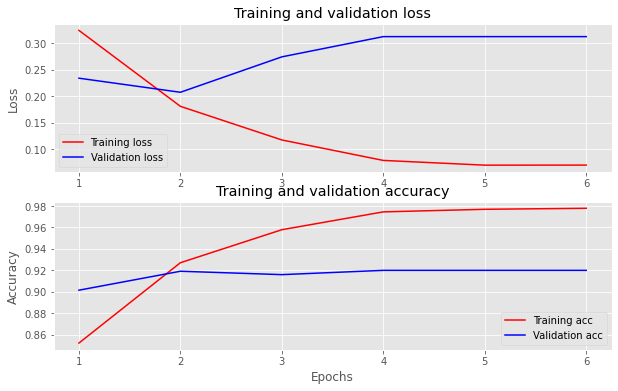

In [61]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [30]:
sample_text=["I like this movie"]

In [31]:
predictions =model.predict(sample_text) 
 

In [32]:
predictions

array([[6.9304398e-04, 1.0370361e-03, 9.9826992e-01]], dtype=float32)

In [33]:
sample_text=["This one was truly awful. Watching with fascinated horror, I kept on asking why have they done this That is, taken all the scenarios out of The Day after Tomorrow, The Perfect Storm and Twister and remixing them in a three-hour miniseries, directed by long-time junk TV director Dick Lowry, with every disaster movie clich known to man and not an ounce of real suspense. Many of the cast were unknown Canadians and location filming was done in Canada, Winnepeg doubling for Chicago, so no doubt tax breaks had something to do with it. Although some ambitious special effects were attempted, the execution is so poor no decent spectacle is achieved. The actors may be a competent lot; the script is so bad no-one had a chance to show it, except perhaps for Randy Quaid as Tommy the Tornado chaser, who went right over the top and was quite amusing.<br /><br />Believe it or not, the producers have since made another one of these Canadian disaster turkeys called Category 7  the End of the World which was very tastefully shown on CBS in the US a few weeks after Hurricane Katrina. How could the network of Ed Murrow and Walter Cronkite do such a thing? In prime time? PT Barnum nobody ever went broke underestimating public taste is proved right once more."]

In [34]:
predictions =model.predict(sample_text)

In [35]:
predictions.argmax(axis=-1)

array([0], dtype=int64)

In [42]:
############################## LSTM ##########################

In [43]:
APPO = {
"aren't" : "are not",
"can't" : "can not",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [44]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = [APPO[word] if word in APPO else word for word in text.split()] 
    
   
    
    return text

In [45]:
data['Phrase_text_clean'] = data['Phrase'].apply(lambda x: clean_text(x))

In [46]:
x=data['Phrase_text_clean']
y=data['Sentiment']

In [47]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [48]:
max_feature = 1000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [49]:
sequences = tokenizer.texts_to_sequences(train_x)

In [50]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 300)

In [51]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=300)

In [61]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense



model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Embedding(max_feature,1000,input_length = 300))
model_2.add(LSTM(128))
model_2.add((Dropout(0.2)))
model_2.add(tf.keras.layers.Dense(3, activation='softmax', name='classifier'))       

model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 1000)         1000000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               578048    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
classifier (Dense)           (None, 3)                 387       
Total params: 1,578,435
Trainable params: 1,578,435
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_2.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = 'adam',
                 metrics= ["accuracy",f1_m,precision_m, recall_m])

In [63]:
history = model_2.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=10,  validation_split= 0.1,shuffle=True)

Epoch 1/10
422/422 [==============================] - 13s 26ms/step - loss: 0.3560 - accuracy: 0.8264 - f1_m: 0.8094 - precision_m: 6208531.0000 - recall_m: 0.9943 - val_loss: 0.2632 - val_accuracy: 0.8858 - val_f1_m: 0.7968 - val_precision_m: 0.6632 - val_recall_m: 1.0000
Epoch 2/10
422/422 [==============================] - 11s 27ms/step - loss: 0.2485 - accuracy: 0.8923 - f1_m: 0.7999 - precision_m: 0.6672 - recall_m: 1.0007 - val_loss: 0.2472 - val_accuracy: 0.8957 - val_f1_m: 0.7973 - val_precision_m: 0.6638 - val_recall_m: 1.0003
Epoch 3/10
422/422 [==============================] - 10s 25ms/step - loss: 0.2196 - accuracy: 0.9054 - f1_m: 0.7996 - precision_m: 0.6669 - recall_m: 1.0003 - val_loss: 0.2367 - val_accuracy: 0.9007 - val_f1_m: 0.7970 - val_precision_m: 0.6633 - val_recall_m: 1.0005
Epoch 4/10
422/422 [==============================] - 10s 24ms/step - loss: 0.2013 - accuracy: 0.9150 - f1_m: 0.7993 - precision_m: 0.6667 - recall_m: 1.0002 - val_loss: 0.2363 - val_accurac

In [64]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

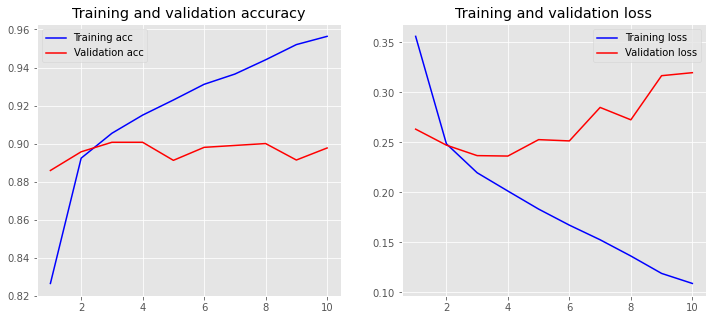

In [65]:
plot_history(history)

In [ ]:
###############  M-LSTM ###############

In [66]:
model_R = tf.keras.Sequential([tf.keras.layers.Embedding(1000,512,input_length=300),
                                 tf.keras.layers.SimpleRNN(256),
                                 tf.keras.layers.Dense(3, activation = "softmax")]
                                )

model_R.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 300, 512)          512000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               196864    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 709,635
Trainable params: 709,635
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_R.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = 'adam',
                 metrics= ["accuracy",f1_m,precision_m, recall_m])

In [69]:
history= model_R.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=10,  validation_split= 0.1,shuffle=True)

Epoch 1/10
422/422 [==============================] - 207s 490ms/step - loss: 0.4571 - accuracy: 0.7400 - f1_m: 0.8065 - precision_m: 0.6765 - recall_m: 1.0011 - val_loss: 0.4381 - val_accuracy: 0.7607 - val_f1_m: 0.8029 - val_precision_m: 0.6692 - val_recall_m: 1.0058
Epoch 2/10
422/422 [==============================] - 212s 502ms/step - loss: 0.4935 - accuracy: 0.7289 - f1_m: 0.8201 - precision_m: 0.6978 - recall_m: 0.9975 - val_loss: 0.5157 - val_accuracy: 0.7040 - val_f1_m: 0.8259 - val_precision_m: 0.7001 - val_recall_m: 1.0094
Epoch 3/10
422/422 [==============================] - 205s 485ms/step - loss: 0.4654 - accuracy: 0.7271 - f1_m: 0.8080 - precision_m: 0.6786 - recall_m: 1.0008 - val_loss: 0.4583 - val_accuracy: 0.7247 - val_f1_m: 0.7987 - val_precision_m: 0.6668 - val_recall_m: 0.9979
Epoch 4/10
422/422 [==============================] - 210s 497ms/step - loss: 0.4352 - accuracy: 0.7555 - f1_m: 0.8013 - precision_m: 0.6700 - recall_m: 0.9992 - val_loss: 0.4292 - val_accur

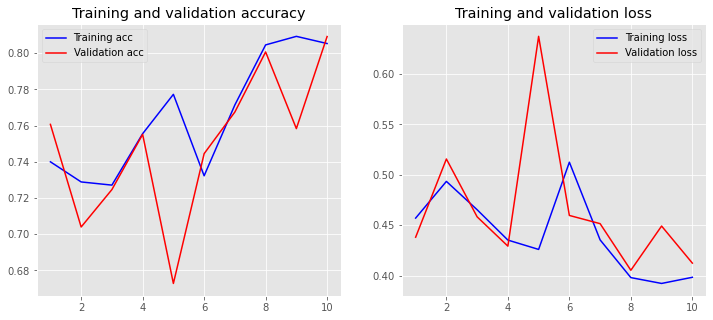

In [70]:
plot_history(history)

In [73]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"    
    
hub_layer = hub.KerasLayer(embedding,output_shape=[128], input_shape=[], dtype=tf.string, trainable=True)

In [74]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
model_3 = tf.keras.Sequential()
model_3.add(hub_layer)
model_3.add(tf.keras.layers.Reshape((1,128)))
model_3.add(LSTM(128))
model_3.add((Dropout(0.3)))
model_3.add(Dense(3,activation='softmax',name='classifier'))            

model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
reshape (Reshape)            (None, 1, 128)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
classifier (Dense)           (None, 3)                 387       
Total params: 124,774,659
Trainable params: 124,774,659
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_3.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = 'adam',
                 metrics= ["accuracy",f1_m,precision_m, recall_m])

In [76]:
history= model_R.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=10,  validation_split= 0.1,shuffle=True)

Epoch 1/10
422/422 [==============================] - 211s 501ms/step - loss: 0.4668 - accuracy: 0.7496 - f1_m: 0.8145 - precision_m: 0.6898 - recall_m: 0.9973 - val_loss: 0.4380 - val_accuracy: 0.7535 - val_f1_m: 0.8040 - val_precision_m: 0.6724 - val_recall_m: 1.0018
Epoch 2/10
422/422 [==============================] - 208s 493ms/step - loss: 0.4587 - accuracy: 0.7510 - f1_m: 0.8091 - precision_m: 0.6830 - recall_m: 0.9951 - val_loss: 0.4778 - val_accuracy: 0.7085 - val_f1_m: 0.8118 - val_precision_m: 0.6889 - val_recall_m: 0.9901
Epoch 3/10
422/422 [==============================] - 207s 490ms/step - loss: 0.4668 - accuracy: 0.7165 - f1_m: 0.8023 - precision_m: 0.6760 - recall_m: 0.9888 - val_loss: 0.4915 - val_accuracy: 0.7038 - val_f1_m: 0.8041 - val_precision_m: 0.6716 - val_recall_m: 1.0044
Epoch 4/10
422/422 [==============================] - 206s 489ms/step - loss: 0.4416 - accuracy: 0.7447 - f1_m: 0.8009 - precision_m: 0.6703 - recall_m: 0.9973 - val_loss: 0.4300 - val_accur

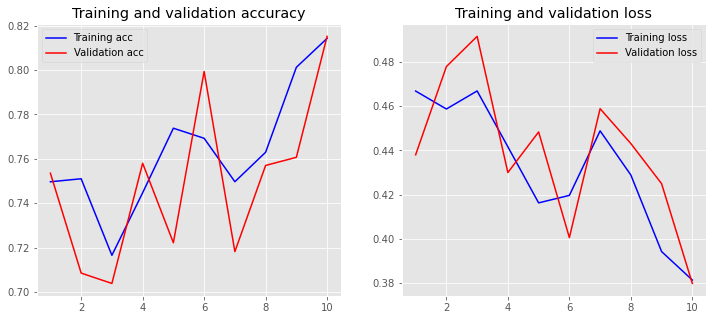

In [77]:
plot_history(history)

In [57]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_model=Sequential()
bi_model.add(Embedding(7000,512,input_length=300))
bi_model.add(Bidirectional(LSTM(256))) #lstm with 100 neurons
bi_model.add((Dropout(0.3)))
bi_model.add(Dense(3,activation='softmax'))
bi_model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy',f1_m,precision_m, recall_m])
print(bi_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 512)          3584000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 1539      
Total params: 5,160,451
Trainable params: 5,160,451
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
history = bi_model.fit(x=pad_sequences, y=train_y, batch_size=64, verbose=1, epochs=10,  validation_split= 0.1)

Epoch 1/10
844/844 [==============================] - 40s 44ms/step - loss: 0.3441 - accuracy: 0.8335 - f1_m: 0.8066 - precision_m: 710900.5000 - recall_m: 1.0010 - val_loss: 0.2528 - val_accuracy: 0.8893 - val_f1_m: 0.7968 - val_precision_m: 0.6639 - val_recall_m: 1.0007
Epoch 2/10
844/844 [==============================] - 36s 42ms/step - loss: 0.2407 - accuracy: 0.8983 - f1_m: 0.7990 - precision_m: 0.6671 - recall_m: 1.0004 - val_loss: 0.2481 - val_accuracy: 0.8947 - val_f1_m: 0.7972 - val_precision_m: 0.6642 - val_recall_m: 1.0012
Epoch 3/10
844/844 [==============================] - 36s 43ms/step - loss: 0.2232 - accuracy: 0.9038 - f1_m: 0.7988 - precision_m: 0.6671 - recall_m: 1.0003 - val_loss: 0.2361 - val_accuracy: 0.8963 - val_f1_m: 0.7968 - val_precision_m: 0.6638 - val_recall_m: 1.0010
Epoch 4/10
844/844 [==============================] - 36s 43ms/step - loss: 0.2082 - accuracy: 0.9131 - f1_m: 0.7988 - precision_m: 0.6670 - recall_m: 1.0004 - val_loss: 0.2414 - val_accuracy